In [124]:
!pip install --upgrade scikit-learn


In [125]:
pip install pmdarima


In [126]:
!pip install numpy

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from math import  sqrt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import statistics as st
from scipy.stats import mode, skew, kurtosis
import seaborn as sns
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout


import pandas as pd
import joblib
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.preprocessing import sequence
from keras.layers import Dense, LSTM, RNN, GRU, Dropout, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import skew, kurtosis

from torch import nn
from torch.utils.data import DataLoader, Dataset
from datetime import datetime, timedelta
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [128]:
eth_df = pd.read_csv("/content/BNB-Historical-Data.csv")
eth_df

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2024,407.30,399.10,408.48,399.00,595.45K,2.05%
1,02/29/2024,399.10,414.62,419.38,391.24,1.16M,-3.74%
2,02/28/2024,414.62,394.60,426.79,394.30,1.39M,5.02%
3,02/27/2024,394.80,401.60,403.69,390.11,932.13K,-1.69%
4,02/26/2024,401.60,388.50,404.49,382.10,1.23M,3.37%
...,...,...,...,...,...,...,...
1823,03/05/2019,13.65,11.40,13.74,11.40,8.34M,19.61%
1824,03/04/2019,11.41,11.45,11.51,10.88,2.74M,-0.29%
1825,03/03/2019,11.45,11.75,11.86,11.20,2.86M,-2.58%
1826,03/02/2019,11.75,11.35,11.80,10.83,3.89M,3.56%


###Data processing

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

from IPython.display import display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [130]:
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df.reset_index(drop=True)
eth_df.set_index('Date', inplace=True)
eth_df.sort_index(ascending=True, inplace=True)

In [131]:
# Hàm để chuyển đổi giá trị có 'K', 'M', hoặc 'B' thành số thực.
def convert_volume(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    else:
        return float(value)

# Áp dụng hàm cho mỗi giá trị trong cột 'Vol.'.
eth_df['Vol.'] = eth_df['Vol.'].apply(convert_volume)

In [132]:
# Hàm để chuyển đổi giá trị có dấu % thành số thực.
def convert_percent_to_float(value):
    return float(value.replace('%', '')) / 100

# Giả sử etr_df là DataFrame của bạn với cột 'Percentage' cần được chuyển đổi.
# etr_df['Percentage'] = ...

# Áp dụng hàm cho mỗi giá trị trong cột 'Percentage'.
eth_df['Change %'] = eth_df['Change %'].apply(convert_percent_to_float)


In [133]:
eth_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961
...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502


In [134]:
eth_df['Price'] = eth_df['Price'].astype(str).str.replace(',', '').astype(float)
eth_df['Open'] = eth_df['Open'].astype(str).str.replace(',', '').astype(float)
eth_df['High'] = eth_df['High'].astype(str).str.replace(',', '').astype(float)
eth_df['Low'] = eth_df['Low'].astype(str).str.replace(',', '').astype(float)


In [135]:
#eth_df['Price'] = eth_df['Price'].str.replace(',', '').astype(float)
#eth_df['Open'] = eth_df['Open'].str.replace(',', '').astype(float)
#eth_df['High'] =eth_df['High'].str.replace(',', '').astype(float)
#eth_df['Low'] = eth_df['Low'].str.replace(',', '').astype(float)
#eth_df

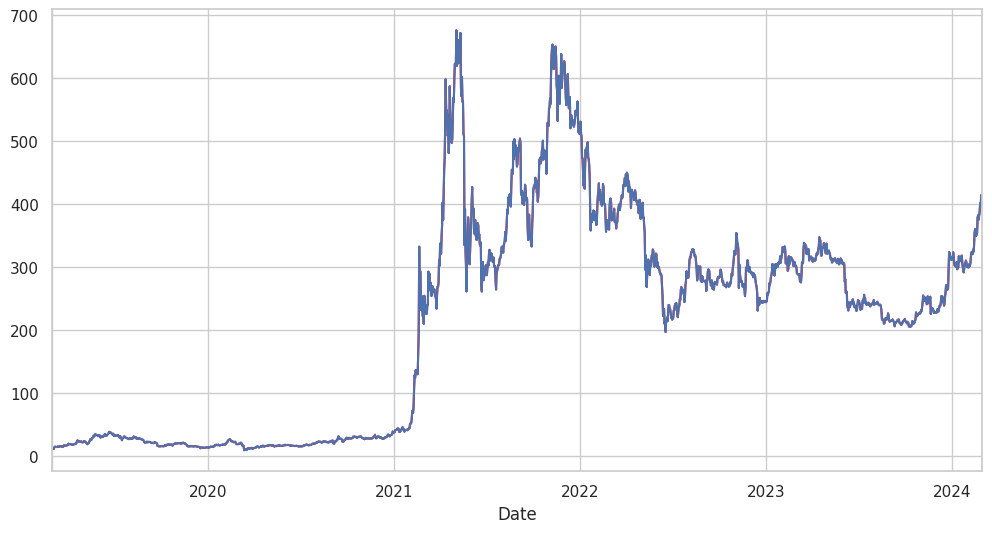

In [136]:
eth_df['Price'].plot(figsize=(12,6),color='red')

plt.plot(eth_df['Price'])

In [137]:
eth_df['Price']

Date
2019-03-01     11.35
2019-03-02     11.75
2019-03-03     11.45
2019-03-04     11.41
2019-03-05     13.65
               ...  
2024-02-26    401.60
2024-02-27    394.80
2024-02-28    414.62
2024-02-29    399.10
2024-03-01    407.30
Name: Price, Length: 1828, dtype: float64

##DATE

###Split data 6:4



In [138]:
window_size = 10
feature_dim = 5

train_size = 0.6
test_size = 0.4

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [139]:
train_index = int(len(eth_df)*train_size)
train_index

1096

In [140]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

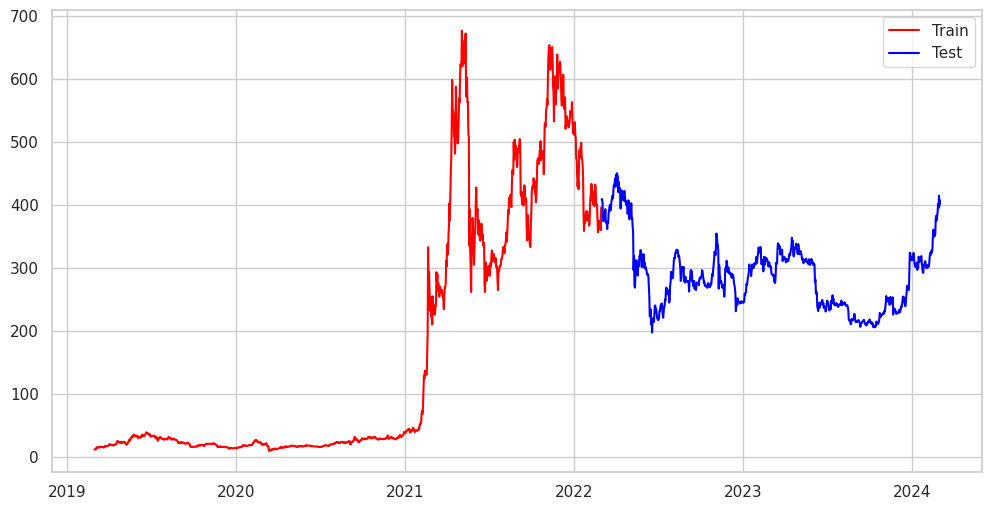

In [141]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [142]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-03-01 to 2024-03-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1828 non-null   float64
 1   Open        1828 non-null   float64
 2   High        1828 non-null   float64
 3   Low         1828 non-null   float64
 4   Vol.        1828 non-null   float64
 5   Change %    1828 non-null   float64
 6   Price_diff  1821 non-null   float64
dtypes: float64(7)
memory usage: 114.2 KB


In [143]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff
Date,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,NaN
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,NaN
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,NaN
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,NaN
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,NaN
...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53


In [144]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

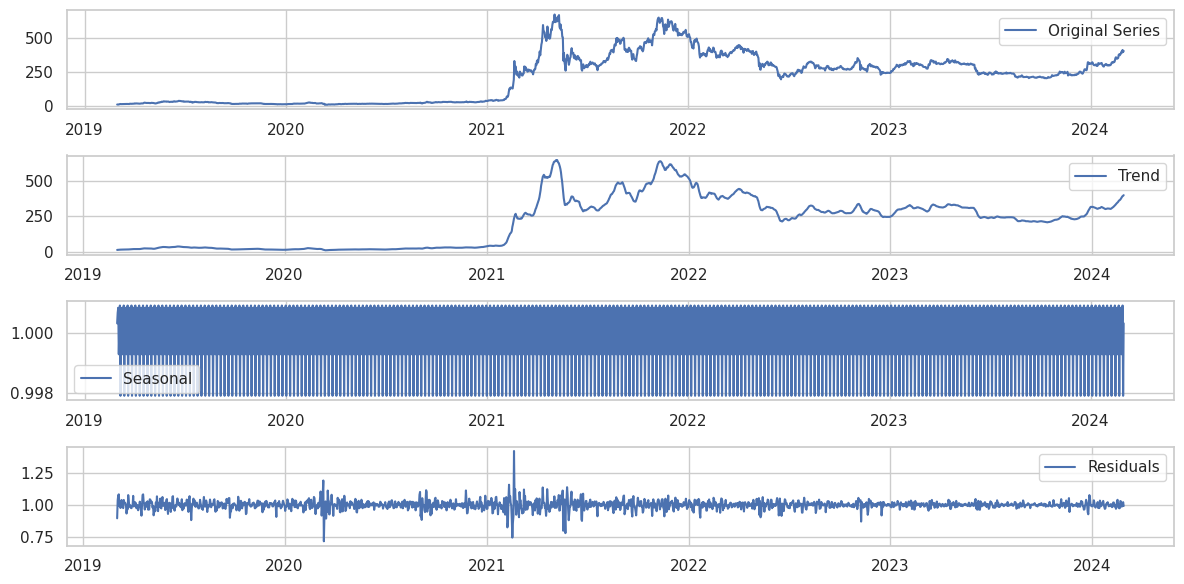

In [145]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [146]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,2.94,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,2.94,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,2.94,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,2.94,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,2.94,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [147]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,14.959677,14.726129,15.253226,14.264194,3.721935e+06,0.018713,1.563871,3.0
2019-04-30,20.614333,20.463333,21.153667,19.689000,2.790667e+06,0.008660,1.350000,4.0
2019-05-31,26.913548,26.549677,27.769032,25.404194,3.359355e+06,0.014574,2.434194,5.0
2019-06-30,33.775333,33.800667,34.811000,32.650333,4.799000e+06,0.000087,0.433667,6.0
2019-07-31,30.068387,30.212258,31.141935,29.064839,3.515161e+06,-0.003690,-1.652903,7.0
...,...,...,...,...,...,...,...,...
2023-11-30,239.862333,239.832667,245.126000,234.689333,8.798903e+05,0.000637,1.136667,11.0
2023-12-31,259.653871,256.931613,263.784516,252.357097,1.038261e+06,0.010677,17.512581,12.0
2024-01-31,307.616774,308.002903,313.546129,300.821613,8.590026e+05,-0.000990,-0.954516,1.0


<Axes: xlabel='Date'>

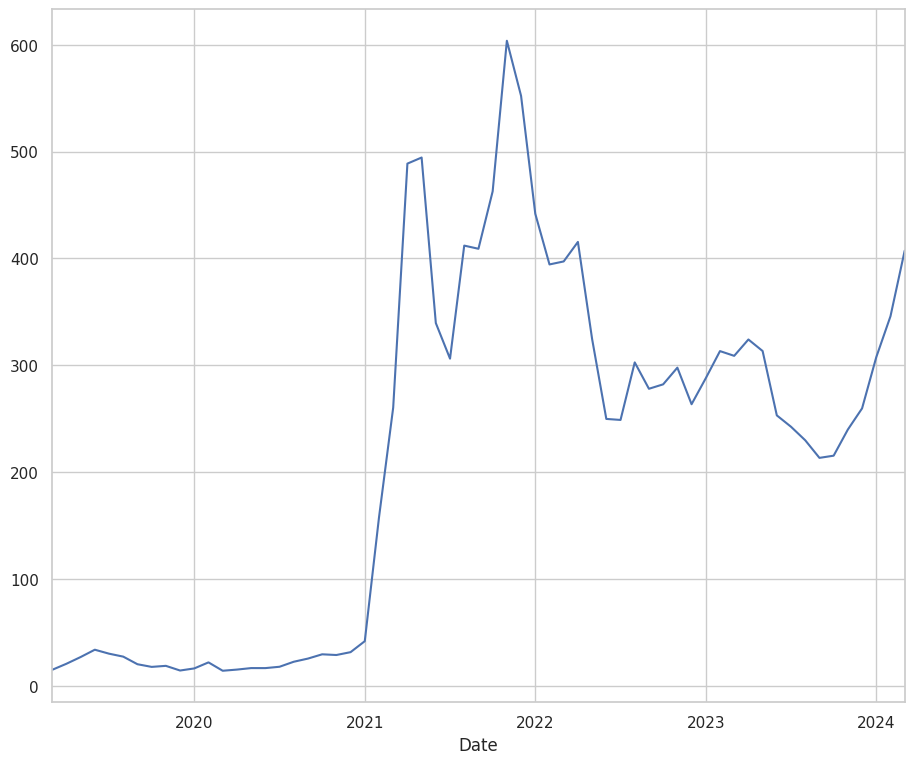

In [148]:
df_monthly['Price'].plot()

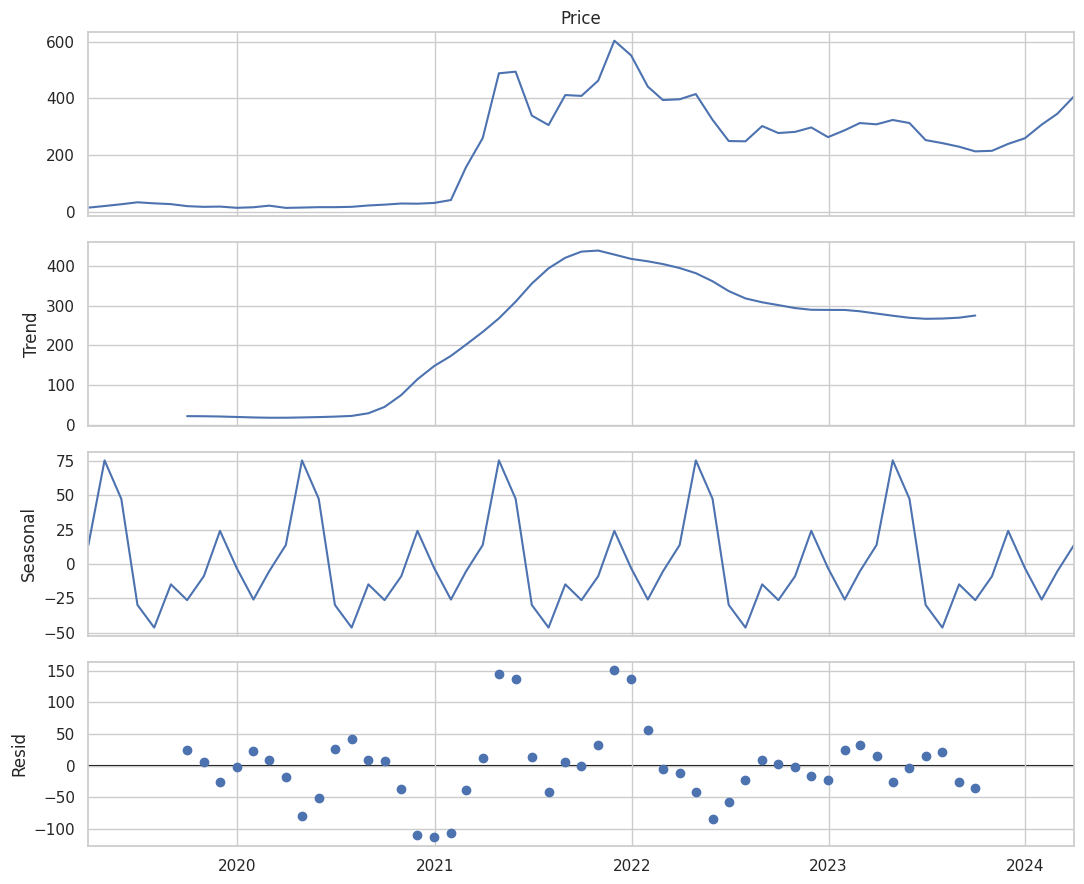

In [149]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [150]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [151]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1

In [152]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=17.61 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=11055.515, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=9504.633, Time=2.74 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=10418.316, Time=4.67 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=11057.392, Time=0.27 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=9741.406, Time=0.52 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=9317.942, Time=7.03 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=13.83 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=2.55 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=11043.839, Time=2.68 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=9307.397, Time=7.00 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=9488.854, Time=1.96 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=10.64 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=4.78 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=9289.865,

In [153]:

model_sarimax = sm.tsa.statespace.SARIMAX(train,
                                          order = (3,0,2),
                                          seasonal_order = (2,1,0,7))
result = model_sarimax.fit()

In [154]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1096
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 7)   Log Likelihood               -4634.159
Date:                            Sun, 30 Jun 2024   AIC                           9284.318
Time:                                    02:25:53   BIC                           9324.263
Sample:                                03-01-2019   HQIC                          9299.437
                                     - 02-28-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0174      0.048     20.995      0.000       0.922       1.112
ar.L2          0.7038      0.067     10.495      0.000       0.572       0.835
ar.L3         -0.7374      0.044    -16.949      0.000      -0.823      -0.652
ma.L1         -0.1434      0.056     -2.571      0.010      -0.253      -0.034
ma.L2         -0.6564      0.052    -12.506      0.000      -0.759      -0.554
ar.S.L7       -0.6356      0.014    -45.491      0.000      -0.663      -0.608
ar.S.L14      -0.4069      0.013    -32.194      0.000      -0.432      -0.382
sigma2       290.4594      4.775     60.825      0.000     281.100     299.819
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):              8958.38
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):             607.27   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [155]:
predictions = result.predict(start, end)
predictions

2022-03-01    395.143058
2022-03-02    401.797775
2022-03-03    389.230427
2022-03-04    390.881043
2022-03-05    390.214214
                 ...    
2024-02-26    389.831944
2024-02-27    401.388742
2024-02-28    400.622879
2024-02-29    388.494716
2024-03-01    392.462933
Freq: D, Name: predicted_mean, Length: 732, dtype: float64

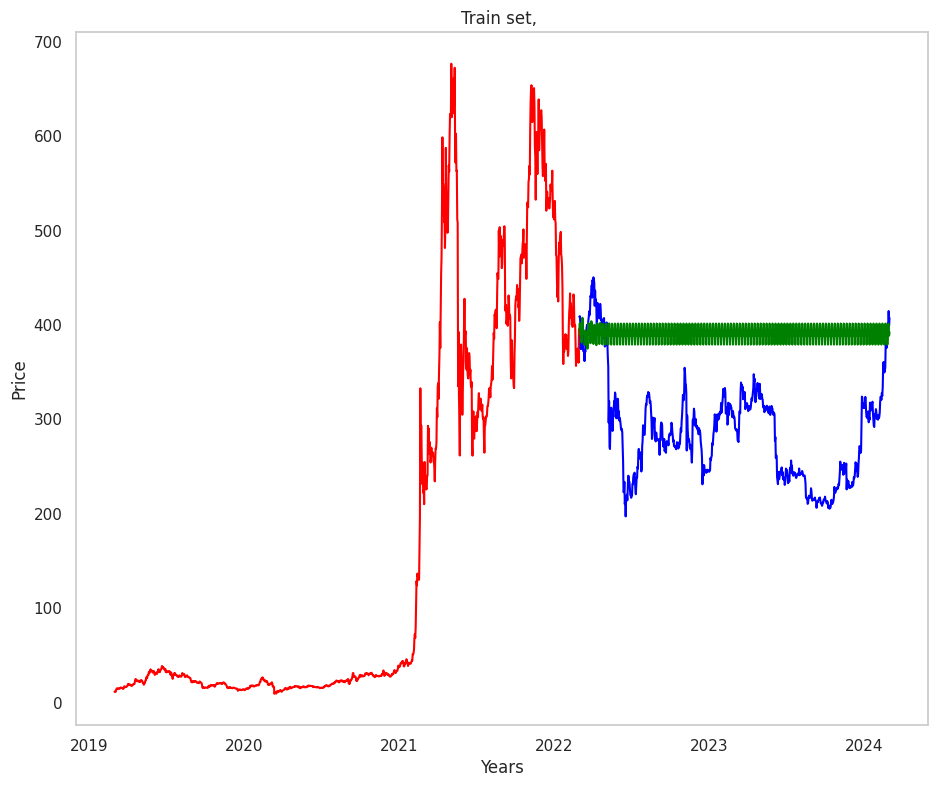

In [156]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [157]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import mean_squared_error

In [158]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.41457160081656697
MAE =  107.10952886946858
RMSE =  117.47111713971995


In [159]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [160]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [161]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

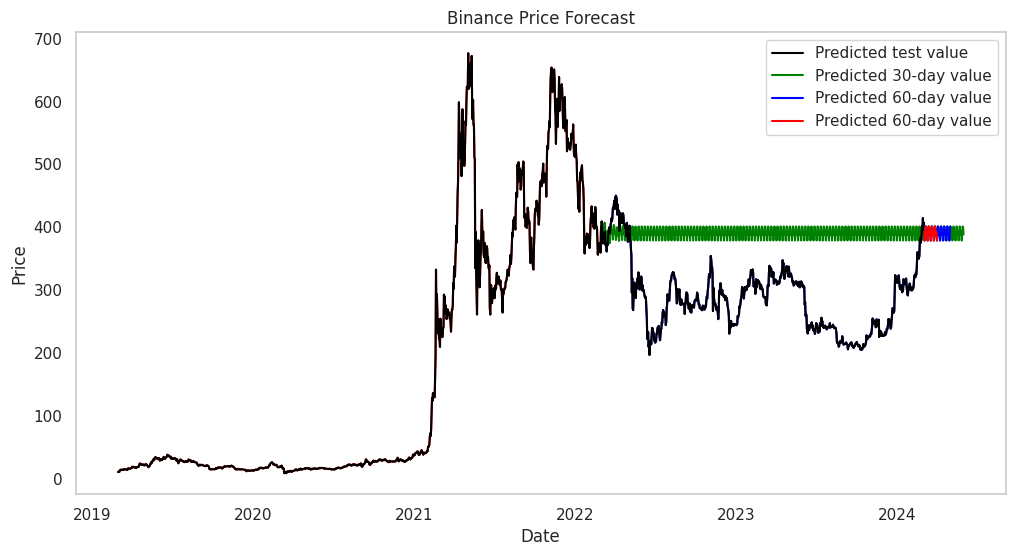

In [162]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Binance Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


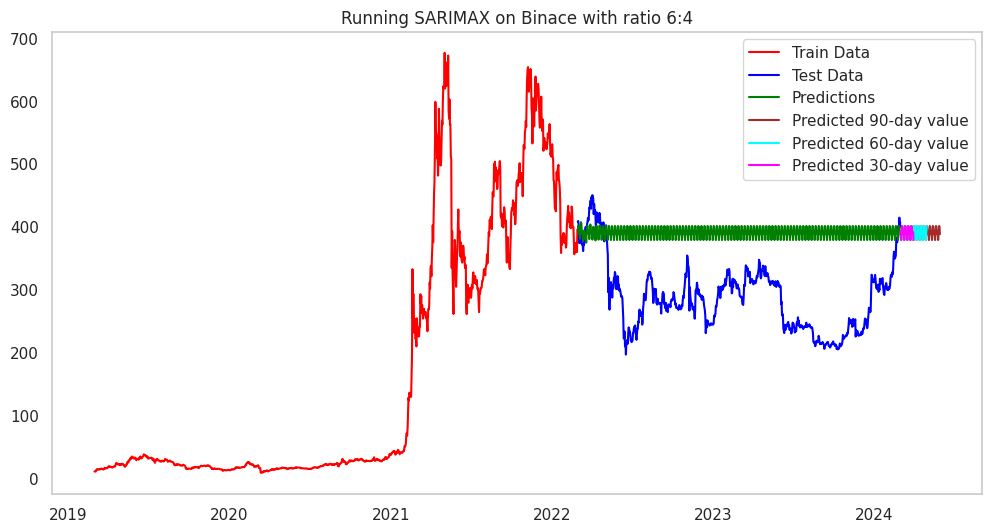

In [163]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running SARIMAX on Binace with ratio 6:4")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 7:3

In [164]:
window_size = 10
feature_dim = 5

train_size = 0.7
test_size = 0.3

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [165]:
train_index = int(len(eth_df)*train_size)
train_index

1279

In [166]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

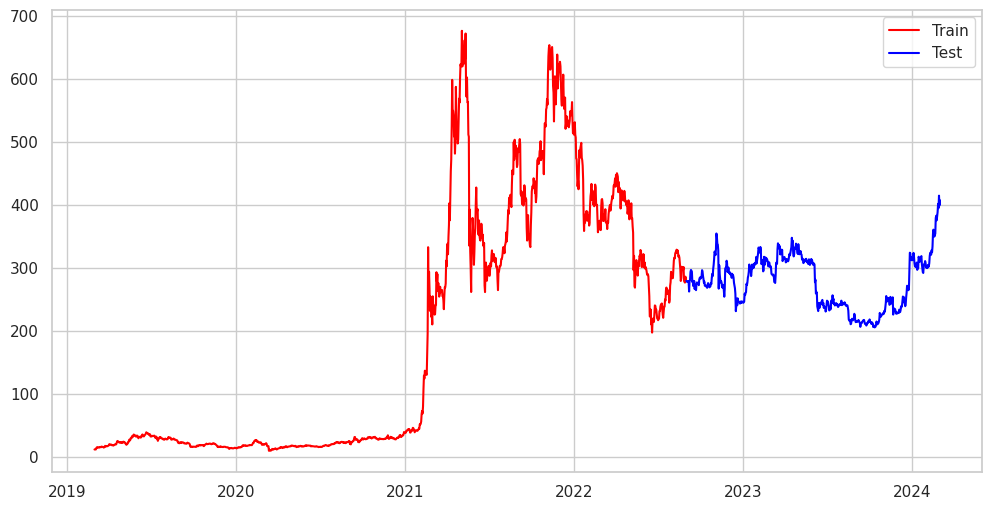

In [167]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [168]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-03-01 to 2024-03-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1828 non-null   float64
 1   Open         1828 non-null   float64
 2   High         1828 non-null   float64
 3   Low          1828 non-null   float64
 4   Vol.         1828 non-null   float64
 5   Change %     1828 non-null   float64
 6   Price_diff   1821 non-null   float64
 7   month_index  1828 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 121.4 KB


In [169]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,NaN,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,NaN,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,NaN,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,NaN,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,NaN,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [170]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

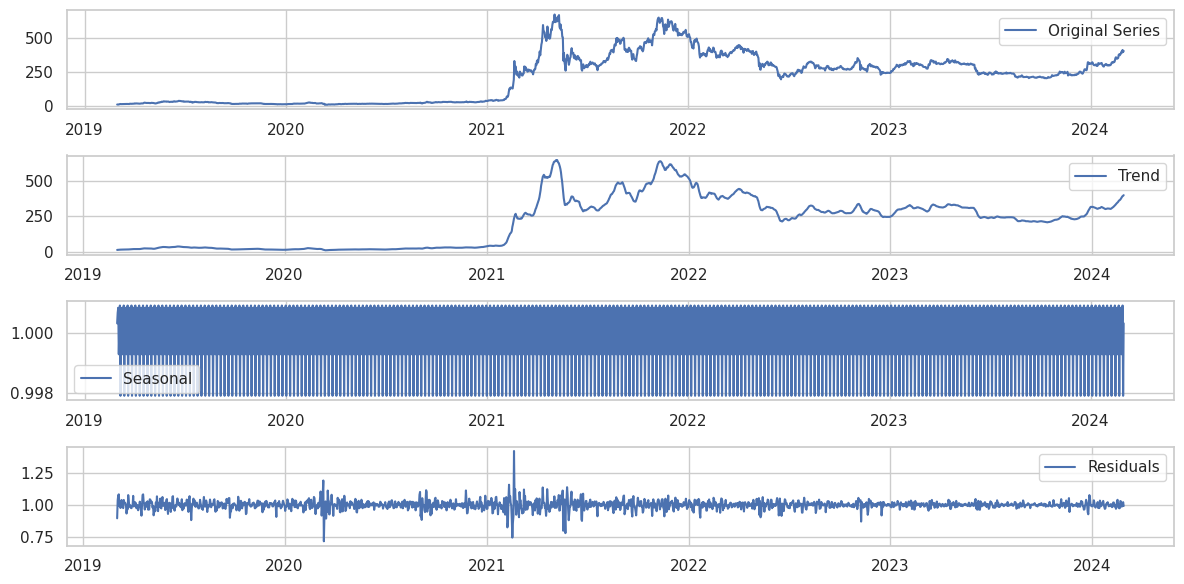

In [171]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [172]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,2.94,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,2.94,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,2.94,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,2.94,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,2.94,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [173]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,14.959677,14.726129,15.253226,14.264194,3.721935e+06,0.018713,1.563871,3.0
2019-04-30,20.614333,20.463333,21.153667,19.689000,2.790667e+06,0.008660,1.350000,4.0
2019-05-31,26.913548,26.549677,27.769032,25.404194,3.359355e+06,0.014574,2.434194,5.0
2019-06-30,33.775333,33.800667,34.811000,32.650333,4.799000e+06,0.000087,0.433667,6.0
2019-07-31,30.068387,30.212258,31.141935,29.064839,3.515161e+06,-0.003690,-1.652903,7.0
...,...,...,...,...,...,...,...,...
2023-11-30,239.862333,239.832667,245.126000,234.689333,8.798903e+05,0.000637,1.136667,11.0
2023-12-31,259.653871,256.931613,263.784516,252.357097,1.038261e+06,0.010677,17.512581,12.0
2024-01-31,307.616774,308.002903,313.546129,300.821613,8.590026e+05,-0.000990,-0.954516,1.0


<Axes: xlabel='Date'>

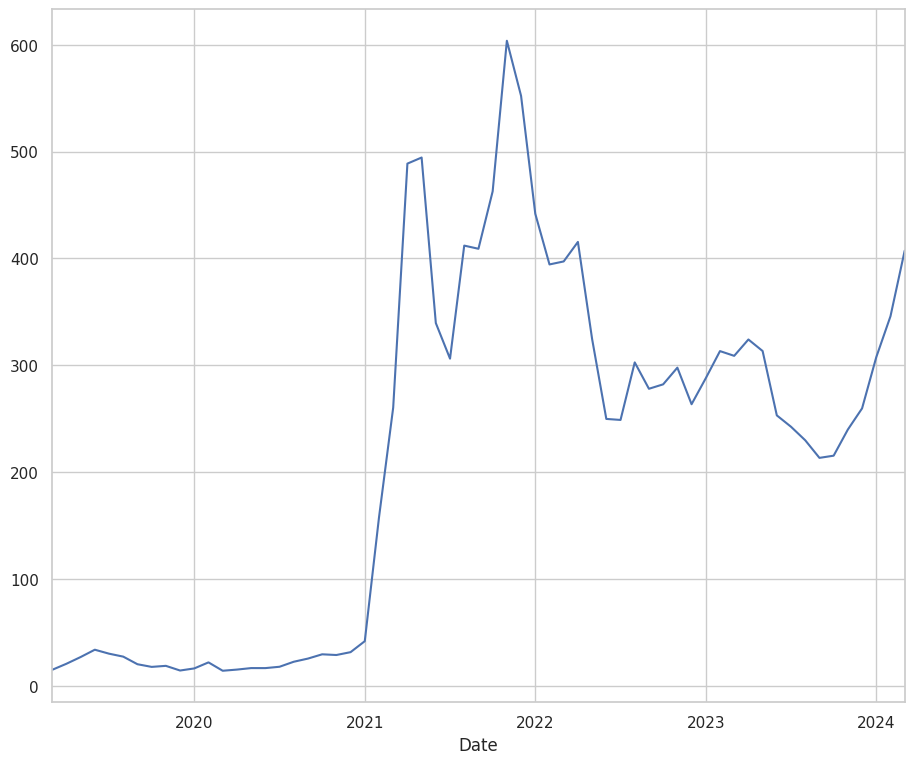

In [174]:
df_monthly['Price'].plot()

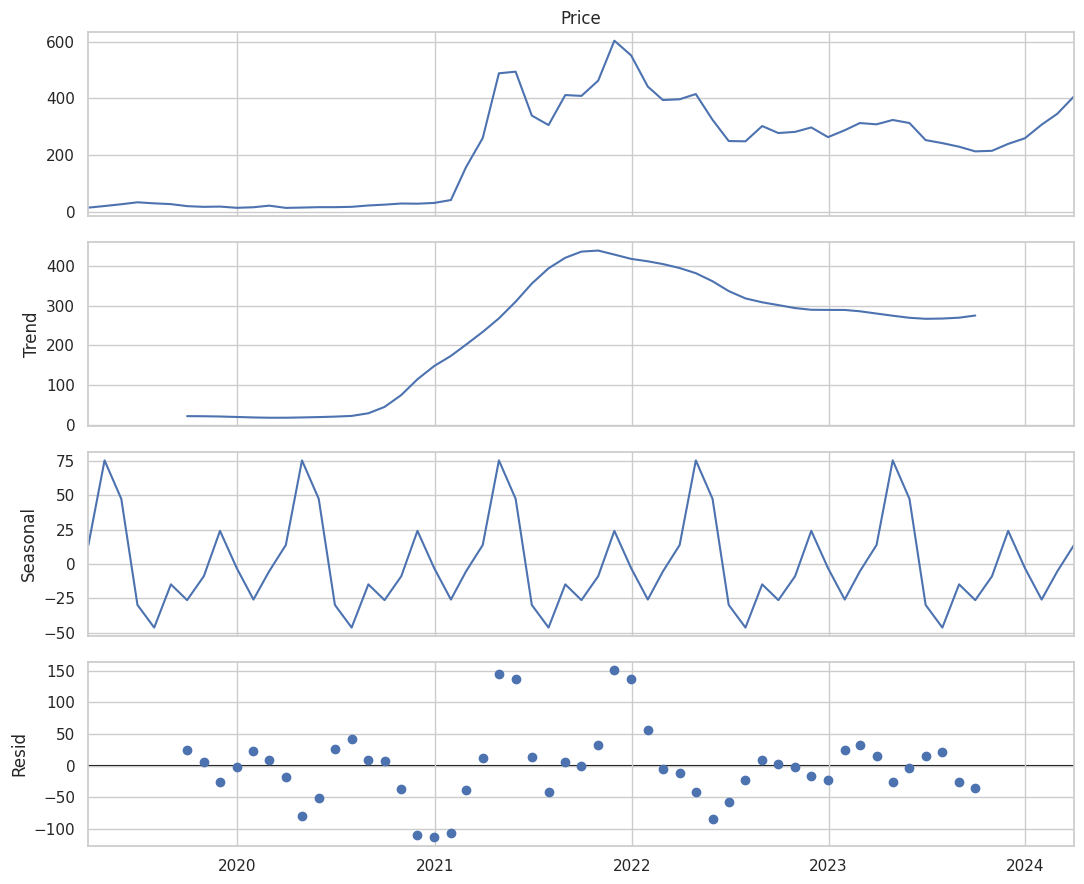

In [175]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [176]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [177]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1

In [178]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=9.85 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=12843.845, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=11030.731, Time=1.66 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=12093.100, Time=1.77 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=12843.866, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=11309.237, Time=0.20 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=10816.129, Time=4.09 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=7.95 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=5.07 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=12834.324, Time=1.96 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=10802.111, Time=9.20 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=11010.432, Time=1.81 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=14.98 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=3.57 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=10779.

In [179]:
# let's train the model with the appropriate parameters, SARIMAX(0, 2, 2)x(0, 2, 2, 12)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                order = (3, 0, 0),
                seasonal_order = (2,1,0,7),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')

Optimization terminated successfully.
         Current function value: 4.156848
         Iterations: 366
         Function evaluations: 576


In [180]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                 1279
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -5316.609
Date:                           Sun, 30 Jun 2024   AIC                          10645.218
Time:                                   02:28:23   BIC                          10676.028
Sample:                               03-01-2019   HQIC                         10656.798
                                    - 08-30-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8494      0.015     56.233      0.000       0.820       0.879
ar.L2          0.2276      0.019     11.834      0.000       0.190       0.265
ar.L3         -0.1389      0.013    -10.667      0.000      -0.164      -0.113
ar.S.L7       -0.6507      0.010    -62.779      0.000      -0.671      -0.630
ar.S.L14      -0.4003      0.012    -34.765      0.000      -0.423      -0.378
sigma2       280.0031      4.419     63.360      0.000     271.342     288.665
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              9656.14
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):             264.31   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [181]:
predictions = result.predict(start, end)
predictions

2022-08-31    283.438974
2022-09-01    281.900639
2022-09-02    273.305769
2022-09-03    273.956994
2022-09-04    276.979405
                 ...    
2024-02-26    270.377684
2024-02-27    268.992095
2024-02-28    268.923188
2024-02-29    269.530132
2024-03-01    256.081925
Freq: D, Name: predicted_mean, Length: 549, dtype: float64

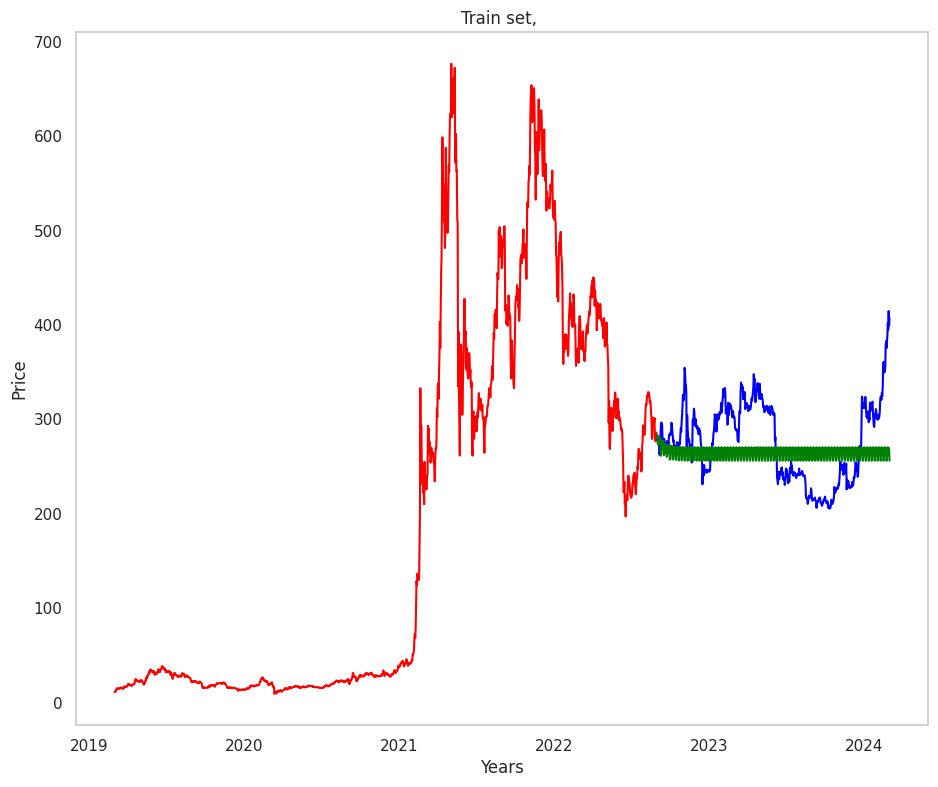

In [182]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [183]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import mean_squared_error

print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.1325405534670396
MAE =  36.96786942497362
RMSE =  43.67535919987284


In [184]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [185]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [186]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

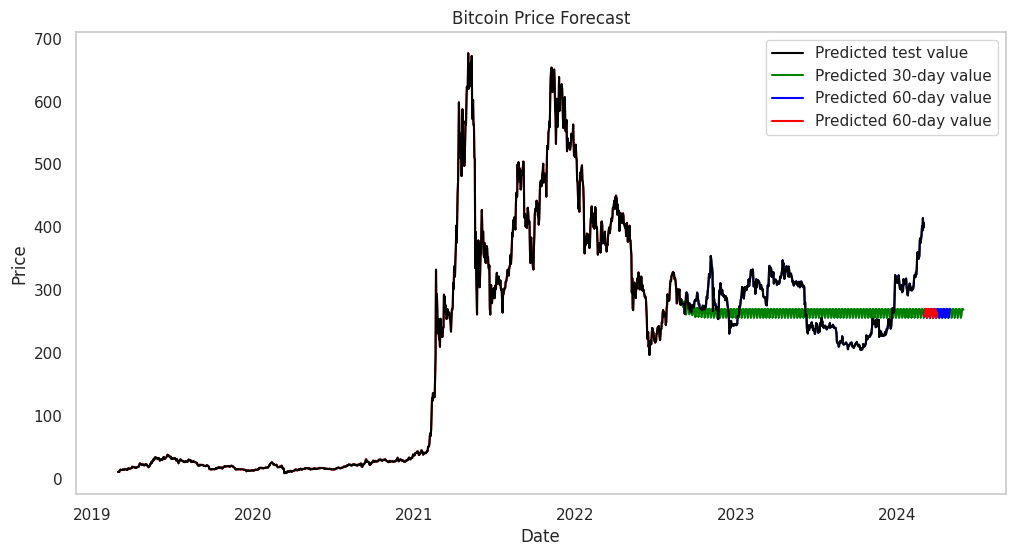

In [187]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Bitcoin Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


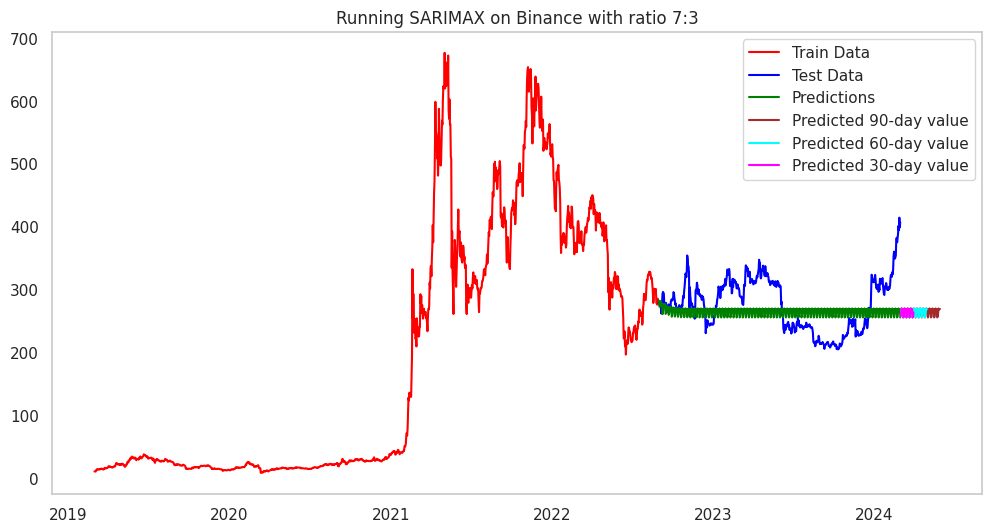

In [188]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running SARIMAX on Binance with ratio 7:3")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


###Split data 8:2



In [189]:
window_size = 10
feature_dim = 5

train_size = 0.8
test_size = 0.2

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [190]:
train_index = int(len(eth_df)*train_size)
train_index

1462

In [191]:
eth_df_train = eth_df.iloc[:train_index]
eth_df_test  = eth_df[train_index:]

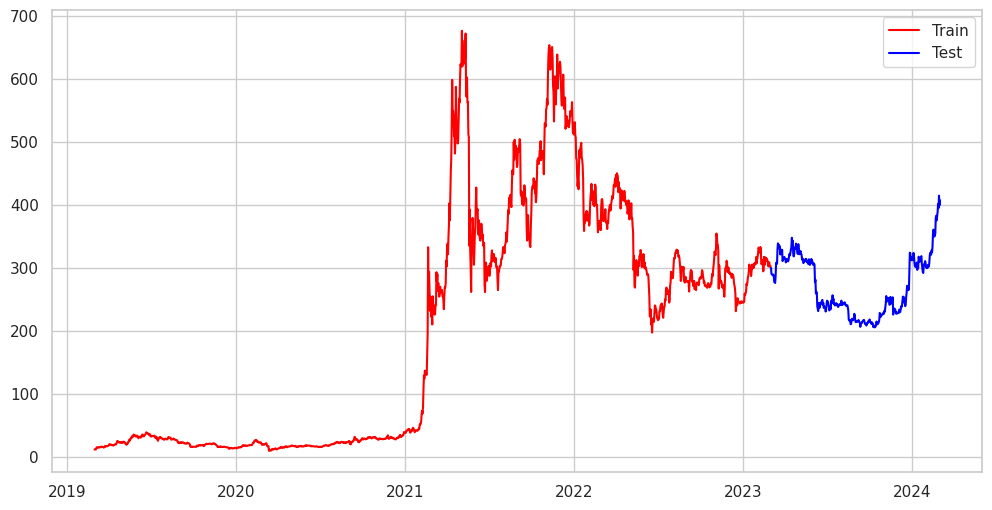

In [192]:
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(eth_df_train).index.to_list(), pd.DataFrame(eth_df_train['Price']), color='red', label='Train')
plt.plot(pd.DataFrame(eth_df_test).index.to_list(),pd.DataFrame(eth_df_test['Price']),color='blue' ,label ='Test')
plt.legend()
plt.show()

In [193]:
eth_df['Price_diff'] = eth_df['Price'].diff(periods=7)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-03-01 to 2024-03-01
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1828 non-null   float64
 1   Open         1828 non-null   float64
 2   High         1828 non-null   float64
 3   Low          1828 non-null   float64
 4   Vol.         1828 non-null   float64
 5   Change %     1828 non-null   float64
 6   Price_diff   1821 non-null   float64
 7   month_index  1828 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 121.4 KB


In [194]:
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,NaN,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,NaN,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,NaN,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,NaN,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,NaN,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [195]:
eth_df['Price_diff'].fillna(method='backfill', inplace=True)

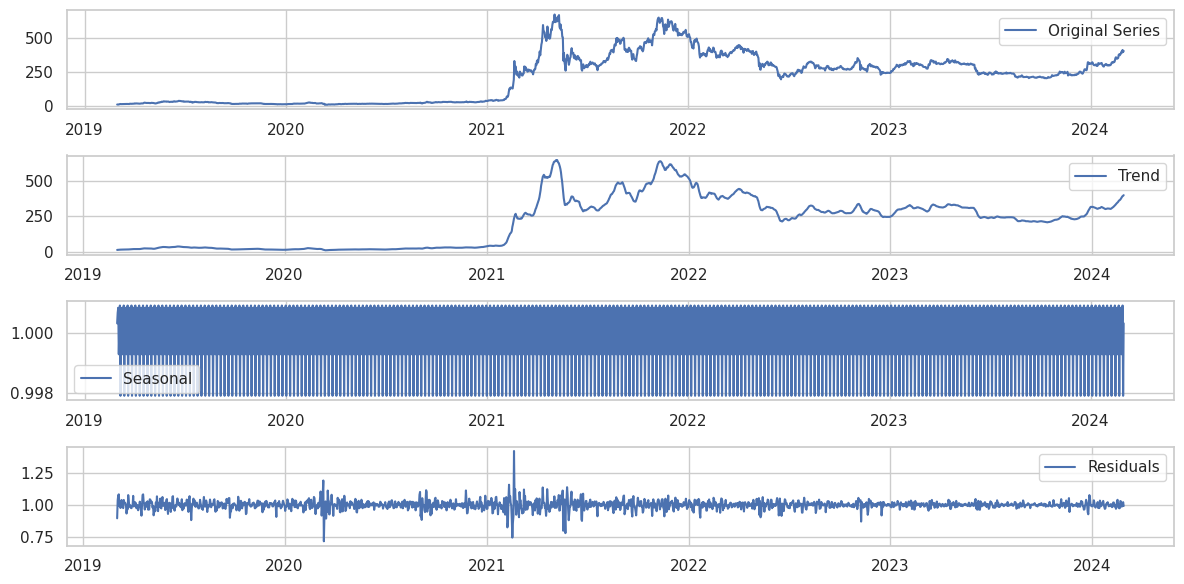

In [196]:
result = seasonal_decompose(eth_df['Price'], model='multiplicative', period=7)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(12,6))

plt.subplot(4, 1, 1)
plt.plot(eth_df['Price'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
# for fun i guess

In [197]:
eth_df['month_index'] = eth_df.index.month
eth_df

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-01,11.35,10.27,11.55,10.24,4020000.0,0.1045,2.94,3
2019-03-02,11.75,11.35,11.80,10.83,3890000.0,0.0356,2.94,3
2019-03-03,11.45,11.75,11.86,11.20,2860000.0,-0.0258,2.94,3
2019-03-04,11.41,11.45,11.51,10.88,2740000.0,-0.0029,2.94,3
2019-03-05,13.65,11.40,13.74,11.40,8340000.0,0.1961,2.94,3
...,...,...,...,...,...,...,...,...
2024-02-26,401.60,388.50,404.49,382.10,1230000.0,0.0337,49.90,2
2024-02-27,394.80,401.60,403.69,390.11,932130.0,-0.0169,40.29,2
2024-02-28,414.62,394.60,426.79,394.30,1390000.0,0.0502,35.53,2


In [198]:
df_monthly = eth_df.resample('M').mean()
df_monthly

,Price,Open,High,Low,Vol.,Change %,Price_diff,month_index
Date,,,,,,,,
2019-03-31,14.959677,14.726129,15.253226,14.264194,3.721935e+06,0.018713,1.563871,3.0
2019-04-30,20.614333,20.463333,21.153667,19.689000,2.790667e+06,0.008660,1.350000,4.0
2019-05-31,26.913548,26.549677,27.769032,25.404194,3.359355e+06,0.014574,2.434194,5.0
2019-06-30,33.775333,33.800667,34.811000,32.650333,4.799000e+06,0.000087,0.433667,6.0
2019-07-31,30.068387,30.212258,31.141935,29.064839,3.515161e+06,-0.003690,-1.652903,7.0
...,...,...,...,...,...,...,...,...
2023-11-30,239.862333,239.832667,245.126000,234.689333,8.798903e+05,0.000637,1.136667,11.0
2023-12-31,259.653871,256.931613,263.784516,252.357097,1.038261e+06,0.010677,17.512581,12.0
2024-01-31,307.616774,308.002903,313.546129,300.821613,8.590026e+05,-0.000990,-0.954516,1.0


<Axes: xlabel='Date'>

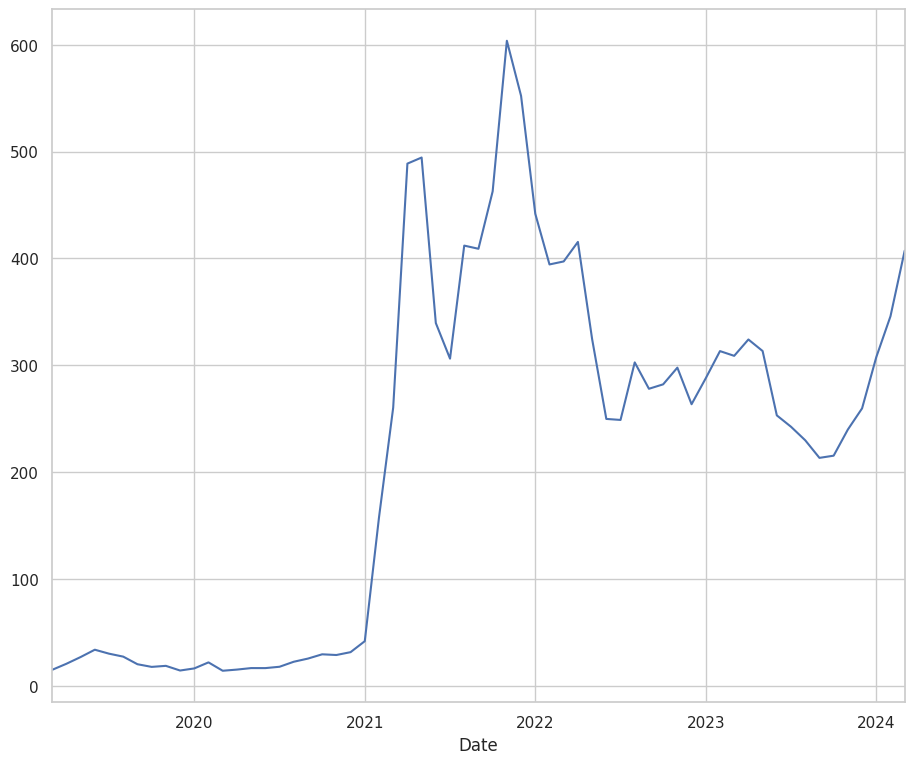

In [199]:
df_monthly['Price'].plot()

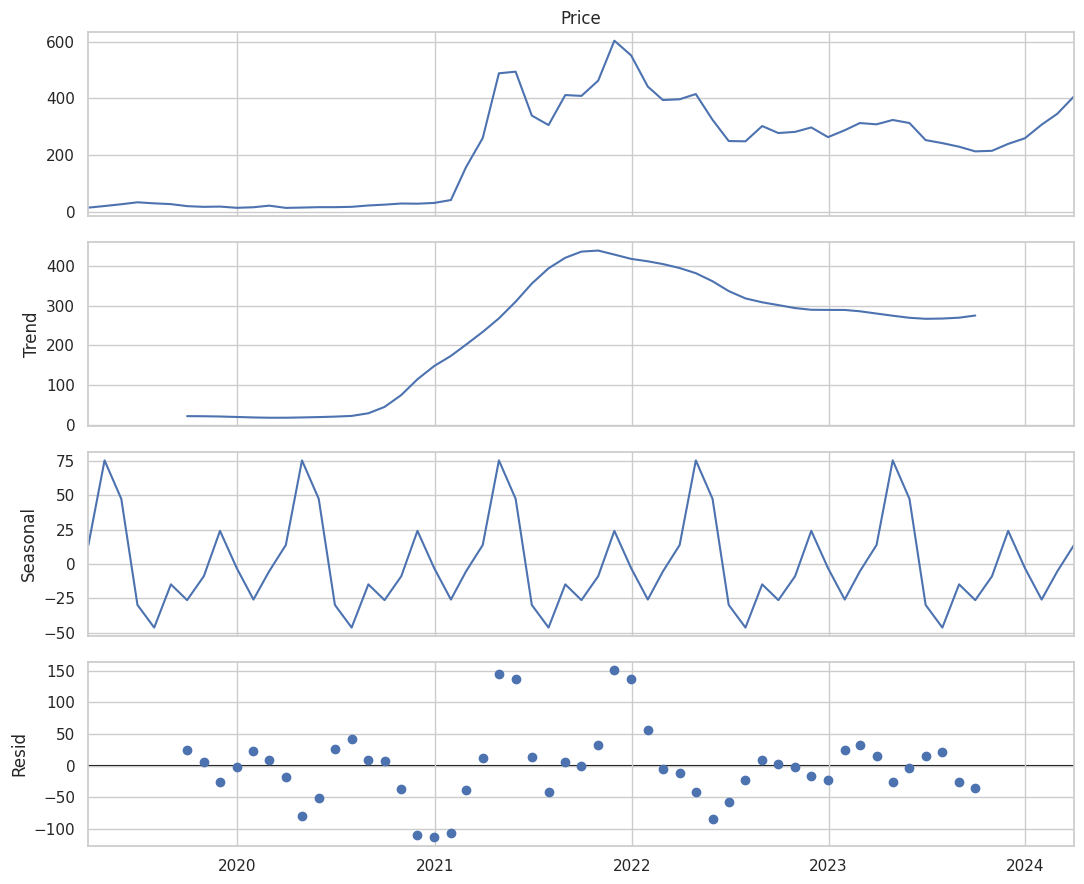

In [200]:
decompose = seasonal_decompose(df_monthly['Price'])
decompose.plot()

plt.show()

In [201]:
#import pmdarima as pm
#model = pm.auto_arima(df_monthly['Price'], trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
					#	d=None, D=1,m=12,
				#		error_action='ignore',
					#	suppress_warnings=True,
				#		stepwise=True)

In [202]:
train = eth_df_train['Price']
test = eth_df_test['Price']
start = len(train)
end = len(train) +len(test) -1

In [203]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=eth_df['month_index'],
						d=None, D=1,m=7,max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=inf, Time=9.55 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=14566.033, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=12498.821, Time=1.88 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=13701.409, Time=2.29 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=14566.234, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=12809.761, Time=0.35 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=12256.542, Time=6.37 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=7.14 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=7.12 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=14554.057, Time=2.07 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=12240.503, Time=8.95 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=12476.480, Time=2.34 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=12.70 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=4.41 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=12217.

In [204]:
# let's train the model with the appropriate parameters, SARIMAX(0, 2, 2)x(0, 2, 2, 12)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                order = (3, 0, 0),
                seasonal_order = (2,1,0,7),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')

Optimization terminated successfully.
         Current function value: 4.128887
         Iterations: 345
         Function evaluations: 524


In [205]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Price   No. Observations:                 1462
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -6036.432
Date:                           Sun, 30 Jun 2024   AIC                          12084.864
Time:                                   02:31:16   BIC                          12116.490
Sample:                               03-01-2019   HQIC                         12096.671
                                    - 03-01-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8472      0.014     61.105      0.000       0.820       0.874
ar.L2          0.2196      0.018     12.487      0.000       0.185       0.254
ar.L3         -0.1303      0.012    -10.853      0.000      -0.154      -0.107
ar.S.L7       -0.6407      0.010    -67.105      0.000      -0.659      -0.622
ar.S.L14      -0.3971      0.011    -37.258      0.000      -0.418      -0.376
sigma2       259.2319      3.753     69.066      0.000     251.875     266.588
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             12066.50
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):             205.20   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [206]:
predictions = result.predict(start, end)
predictions

2023-03-02    289.728397
2023-03-03    290.278066
2023-03-04    293.929959
2023-03-05    297.010861
2023-03-06    290.037278
                 ...    
2024-02-26    289.309457
2024-02-27    287.948594
2024-02-28    294.169031
2024-02-29    284.847737
2024-03-01    285.834501
Freq: D, Name: predicted_mean, Length: 366, dtype: float64

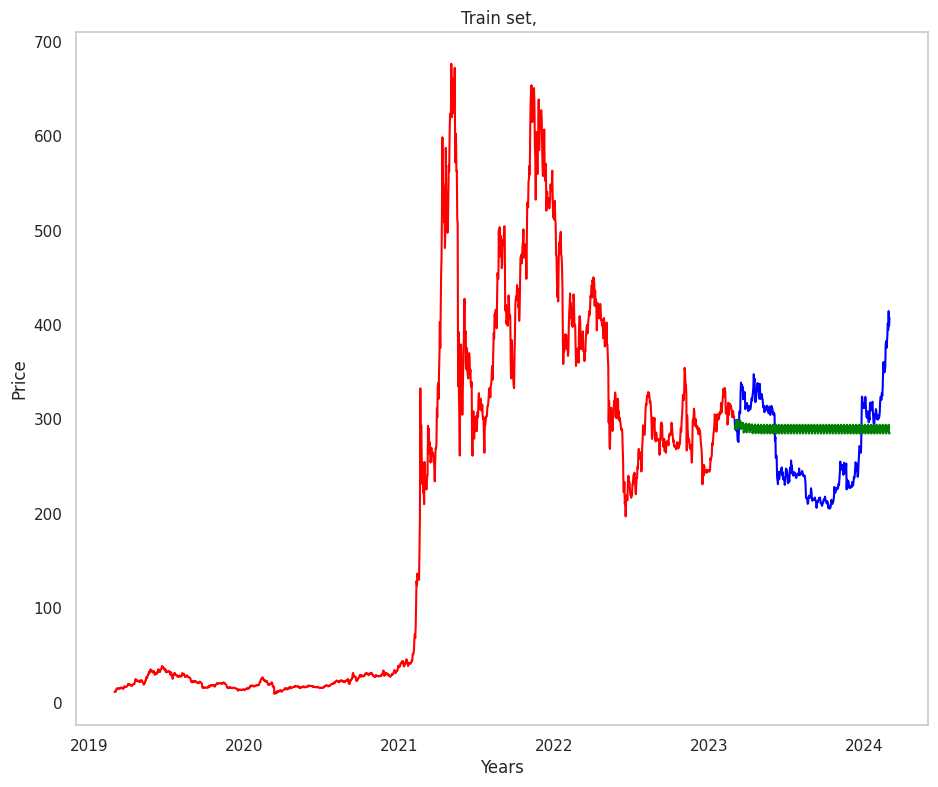

In [207]:
plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()

plt.show()

In [208]:
from sklearn.metrics import mean_squared_error


print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  0.17984509484908498
MAE =  45.231426021664795
RMSE =  50.979470177875136


In [209]:
start = len(eth_df)

end = (len(eth_df) - 1) + 30

forecast_30 = result.predict(start, end)

In [210]:
start = len(eth_df)


end = (len(eth_df) - 1) + 60


forecast_60 = result.predict(start, end)

In [211]:
start = len(eth_df)


end = (len(eth_df) - 1) + 90


forecast_90 = result.predict(start, end)

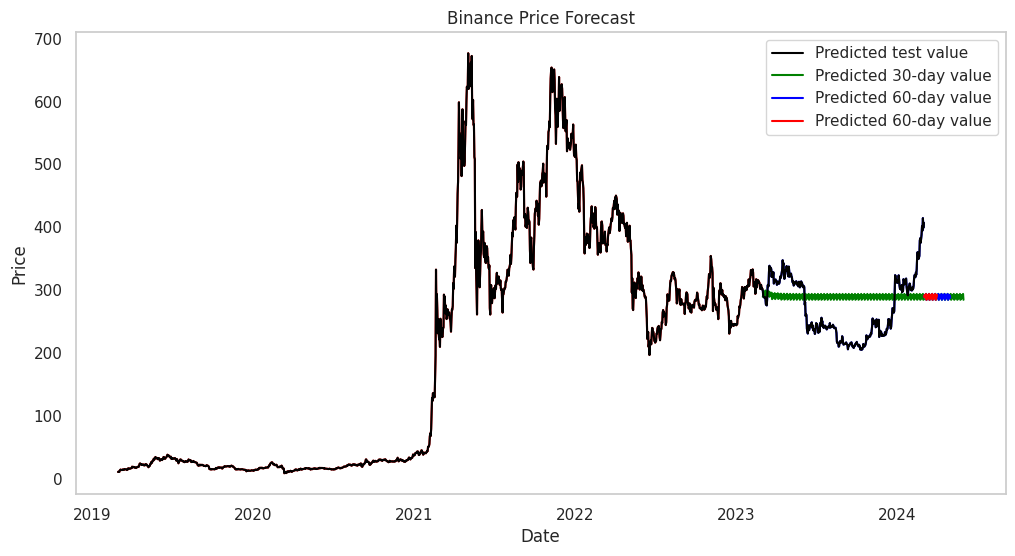

In [212]:
plt.figure(figsize=(12, 6))

plt.plot(train, color = "red")
plt.plot(test, color = "blue")
plt.plot(predictions, color = "green")

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')


plt.plot(eth_df['Price'], color = 'black', label='Predicted test value')
plt.plot(forecast_90, color = 'green', label='Predicted 30-day value')
plt.plot(forecast_60, color = 'blue', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'red', label='Predicted 60-day value')

# title and axis captions
plt.title("Binance Price Forecast")
plt.ylabel("Price")
plt.xlabel('Date')

# add a legend
plt.legend()

# add a grid
plt.grid()

# display the plot
plt.show()


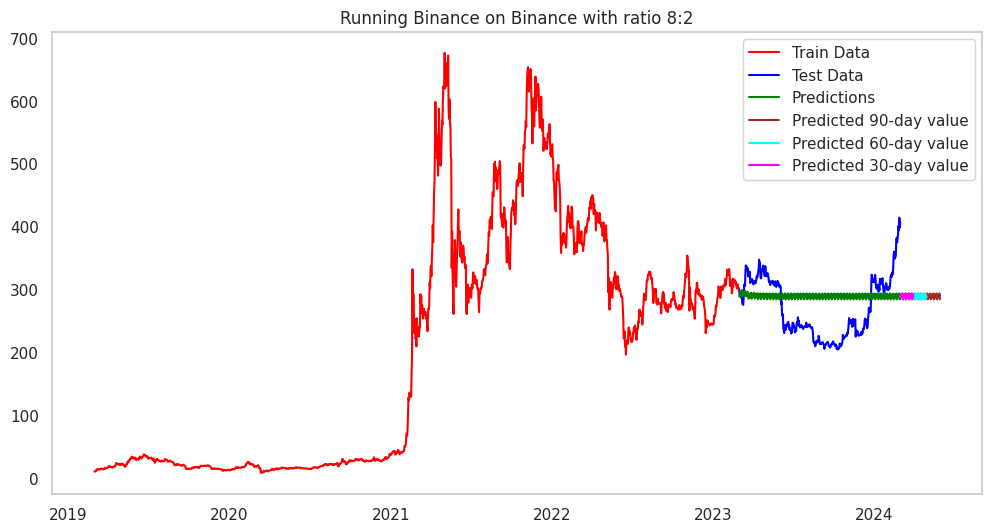

In [213]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_90, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_60, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_30, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running Binance on Binance with ratio 8:2")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


##MONTH

###Split data with ratio 6:4

In [214]:
window_size = 10
feature_dim = 5

train_size = 0.6
test_size = 0.4

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [215]:
df = eth_df[['Price']].copy()


In [216]:
df_monthly = df.resample('M').mean() # changing the step from "daily on weekdays" to "monthly average"
df_monthly.head()

,Price
Date,
2019-03-31,14.959677
2019-04-30,20.614333
2019-05-31,26.913548
2019-06-30,33.775333
2019-07-31,30.068387


<Axes: xlabel='Date'>

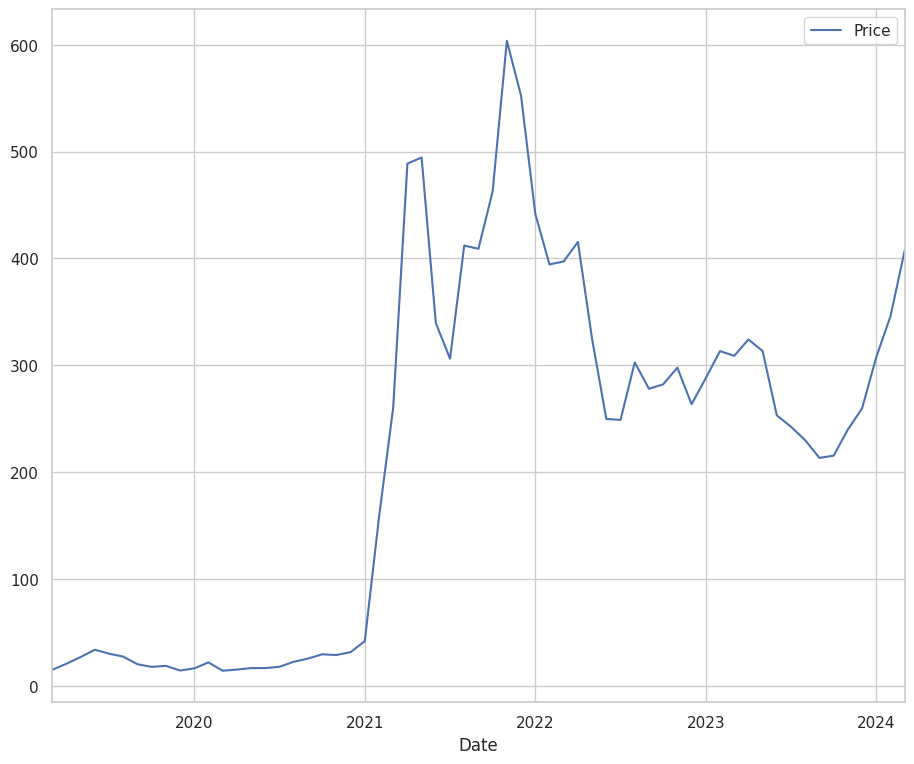

In [217]:
# Let's plot our data
df_monthly.plot()

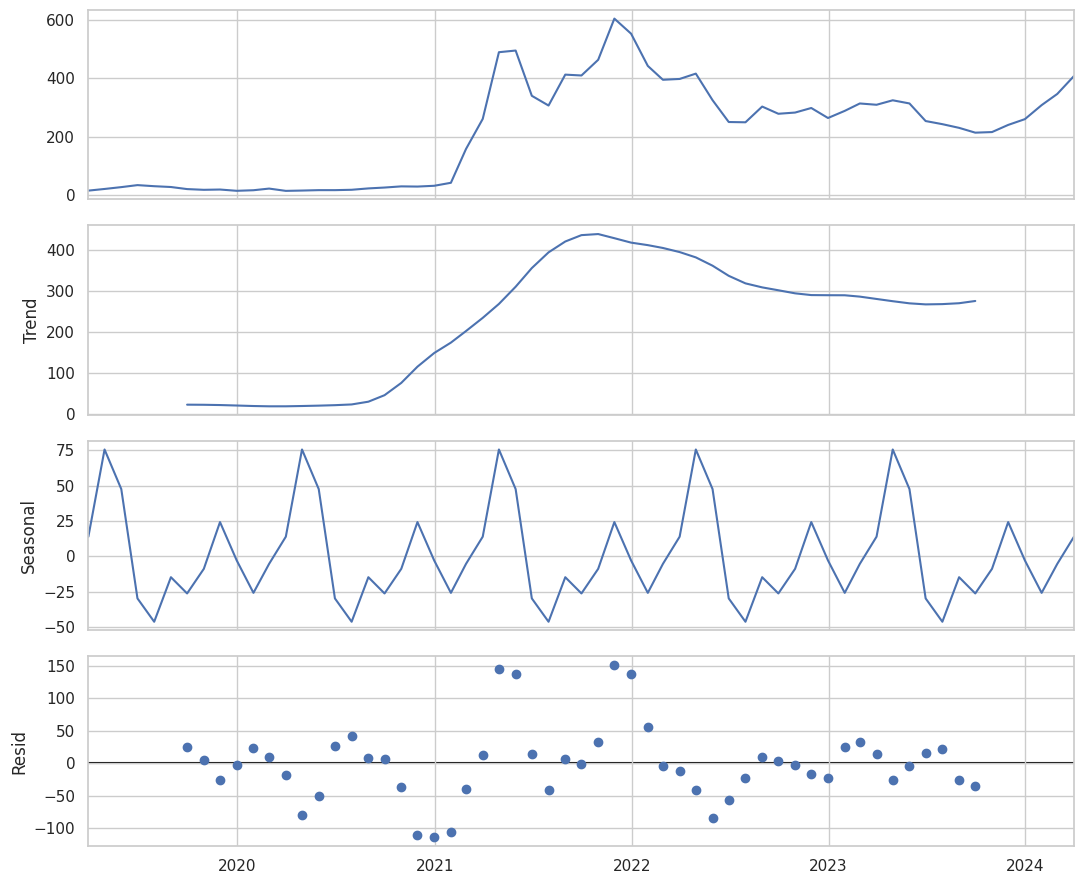

In [218]:
# importing the seasonal_decompose function from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# setting the size of the graph
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

# applying the function to the data
decompose = seasonal_decompose(df_monthly)
decompose.plot()

plt.show()

In [219]:
train_index = int(len(df_monthly)*train_size)
train_index

36

In [220]:
len(df_monthly)

61

In [221]:
print(len(train))

1462


In [222]:
print(len(test))

366


In [223]:
# the training set will include data up to and including December 2016
train = df_monthly[:train_index]

# test set will start from January 2017 (essentially one year)
test = df_monthly[train_index:]

In [224]:
print(len(train))


36


In [225]:
print(len(test))

25


In [226]:
df_monthly['month_index'] = df_monthly.index.month
df_monthly

,Price,month_index
Date,,
2019-03-31,14.959677,3
2019-04-30,20.614333,4
2019-05-31,26.913548,5
2019-06-30,33.775333,6
2019-07-31,30.068387,7
...,...,...
2023-11-30,239.862333,11
2023-12-31,259.653871,12
2024-01-31,307.616774,1


In [227]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=df_monthly,
						d=None, D=1, m=12, max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=273.294, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=273.214, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=270.476, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=269.121, Time=0.08 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=270.476, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=272.479, Time=0.19 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=271.110, Time=0.11 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=271.103, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=271.545, Time=0.06 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=271.045, Time=0.25 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 2.466 seconds


In [228]:
# forcibly disable system warnings
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# let's train the model with the appropriate parameters, SARIMAX(0, 2, 2)x(0, 2, 2, 12)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                 order = (0,1,1),
                seasonal_order = (0,1,0,12),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')


Optimization terminated successfully.
         Current function value: 3.383883
         Iterations: 35
         Function evaluations: 69


In [229]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -121.820
Date:                             Sun, 30 Jun 2024   AIC                            247.640
Time:                                     02:31:23   BIC                            249.729
Sample:                                 03-31-2019   HQIC                           248.093
                                      - 02-28-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5907      0.172      3.440      0.001       0.254       0.927
sigma2      6386.6590   1986.395      3.215      0.001    2493.397    1.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.95   Prob(JB):                         0.84
Heteroskedasticity (H):             235.73   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [230]:
# the test forecast period will start from the end of the training period
start = len(train)

# and it will end at the end of the test
end = len(train) + len(test) - 1

# apply the method predict
predictions = result.predict(start, end)
predictions

2022-03-31    420.599750
2022-04-30    648.965664
2022-05-31    654.656202
2022-06-30    499.738331
2022-07-31    466.407815
                 ...    
2023-11-30    924.158995
2023-12-31    872.557565
2024-01-31    762.233049
2024-02-29    714.778590
2024-03-31    740.984412
Freq: M, Name: predicted_mean, Length: 25, dtype: float64

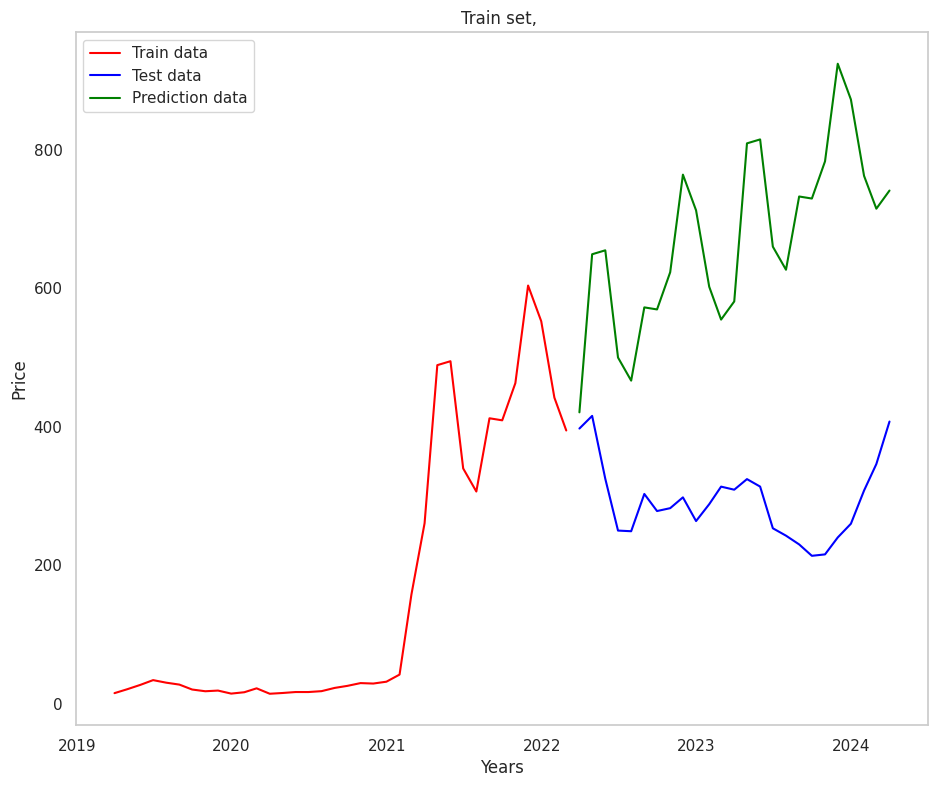

In [231]:
plt.plot(train, color = "red", label ='Train data')
plt.plot(test, color = "blue", label = 'Test data')
plt.plot(predictions, color = "green", label = 'Prediction data')

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()
plt.legend()
plt.show()

In [232]:
# forecast period from the end of available data
start = len(df_monthly)
end = (len(df_monthly) - 1) + 1

forecast = result.predict(start, end)

# let's look at the forecast for the whole of 2023
#forecast[-12:]

In [233]:
start = len(df_monthly)

end = (len(df_monthly) -1) + 2

forecast_1 = result.predict(start, end)

In [234]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 3

forecast_2 = result.predict(start, end)

In [235]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 4

forecast_3 = result.predict(start, end)

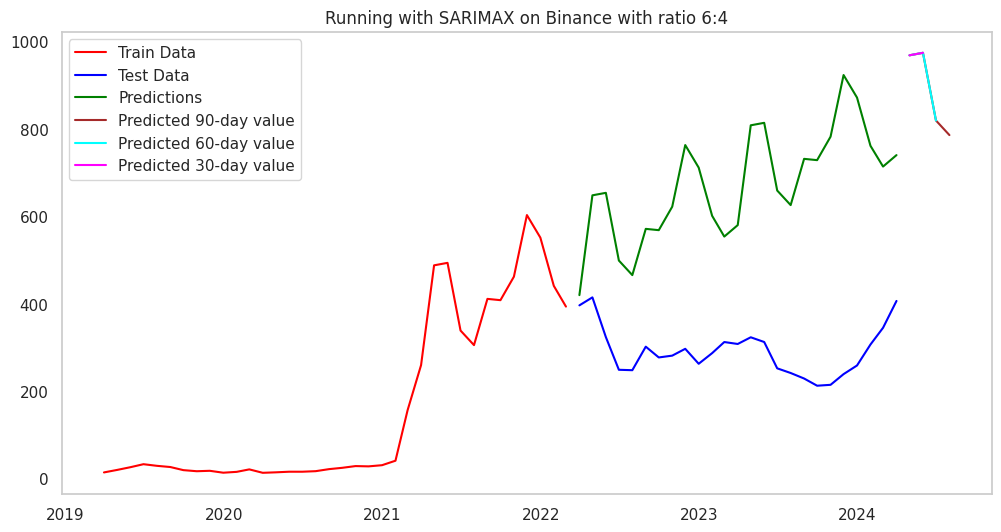

In [236]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_3, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_2, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_1, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running with SARIMAX on Binance with ratio 6:4")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


In [237]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  1.3910473342955925
MAE =  380.6693769985678
RMSE =  406.7528963522697


###Split data with ratio 7:3




In [281]:
window_size = 10
feature_dim = 5

train_size = 0.7
test_size = 0.3

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [282]:
df = eth_df[['Price']].copy()


In [283]:
df_monthly = df.resample('M').mean() # changing the step from "daily on weekdays" to "monthly average"
df_monthly.head()

,Price
Date,
2019-03-31,14.959677
2019-04-30,20.614333
2019-05-31,26.913548
2019-06-30,33.775333
2019-07-31,30.068387


<Axes: xlabel='Date'>

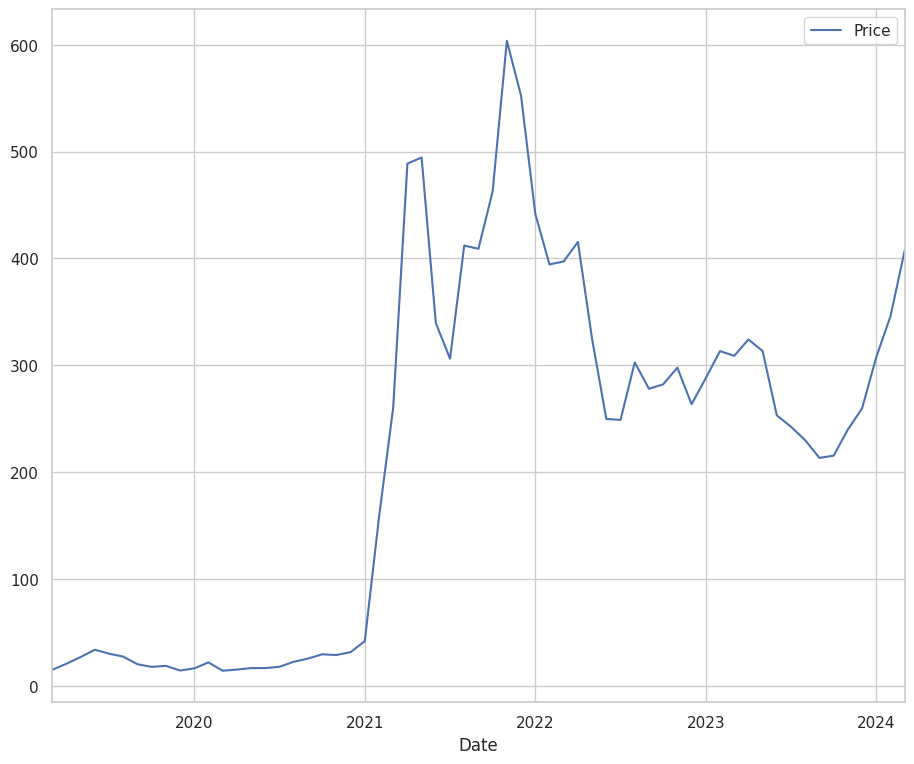

In [284]:
# Let's plot our data
df_monthly.plot()

In [285]:
train_index = int(len(df_monthly)*train_size)
train_index

42

In [286]:
len(df_monthly)

61

In [287]:
# the training set will include data up to and including December 2016
train = df_monthly[:train_index]

# test set will start from January 2017 (essentially one year)
test = df_monthly[train_index:]

In [288]:
print(len(train))


42


In [289]:
print(len(test))

19


In [290]:
df_monthly['month_index'] = df_monthly.index.month
df_monthly

,Price,month_index
Date,,
2019-03-31,14.959677,3
2019-04-30,20.614333,4
2019-05-31,26.913548,5
2019-06-30,33.775333,6
2019-07-31,30.068387,7
...,...,...
2023-11-30,239.862333,11
2023-12-31,259.653871,12
2024-01-31,307.616774,1


In [291]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=df_monthly,
						d=None, D=1, m=12, max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=411.974, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=356.930, Time=0.60 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=421.850, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=363.030, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=352.226, Time=0.37 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=356.086, Time=0.12 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.59 sec
 AR

In [302]:
# forcibly disable system warnings
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# let's train the model with the appropriate parameters, SARIMAX(0, 2, 2)x(0, 2, 2, 12)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                 order = (3,0,0),
                seasonal_order = (2,1,0,12),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')

In [306]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                   42
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood                  25.332
Date:                            Sun, 30 Jun 2024   AIC                            -38.664
Time:                                    02:37:43   BIC                            -44.073
Sample:                                03-31-2019   HQIC                           -49.536
                                     - 08-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3917   1.77e-06   2.22e+05      0.000       0.392       0.392
ar.L2         -0.4977   1.19e-06  -4.18e+05      0.000      -0.498      -0.498
ar.L3          0.4964   1.77e-06    2.8e+05      0.000       0.496       0.496
ar.S.L12      -0.1301   1.75e-06  -7.45e+04      0.000      -0.130      -0.130
ar.S.L24       6.1625   7.34e-08    8.4e+07      0.000       6.163       6.163
sigma2      2.083e-08   4.98e-09      4.186      0.000    1.11e-08    3.06e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.38   Prob(JB):                         0.81
Heteroskedasticity (H):                nan   Skew:                             0.53
Prob(H) (two-sided):                   nan   Kurtosis:                         1.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.57e+18. Standard errors may be unstable.
"""

In [307]:
# the test forecast period will start from the end of the training period
start = len(train)

# and it will end at the end of the test
end = len(train) + len(test) - 1

# apply the method predict
predictions = result.predict(start, end)
predictions

2022-09-30     381.598556
2022-10-31     517.115041
2022-11-30     597.025883
2022-12-31     568.525922
2023-01-31     554.525368
                 ...     
2023-11-30    4137.944299
2023-12-31    3777.274983
2024-01-31    3007.093908
2024-02-29    2566.748527
2024-03-31    2537.636460
Freq: M, Name: predicted_mean, Length: 19, dtype: float64

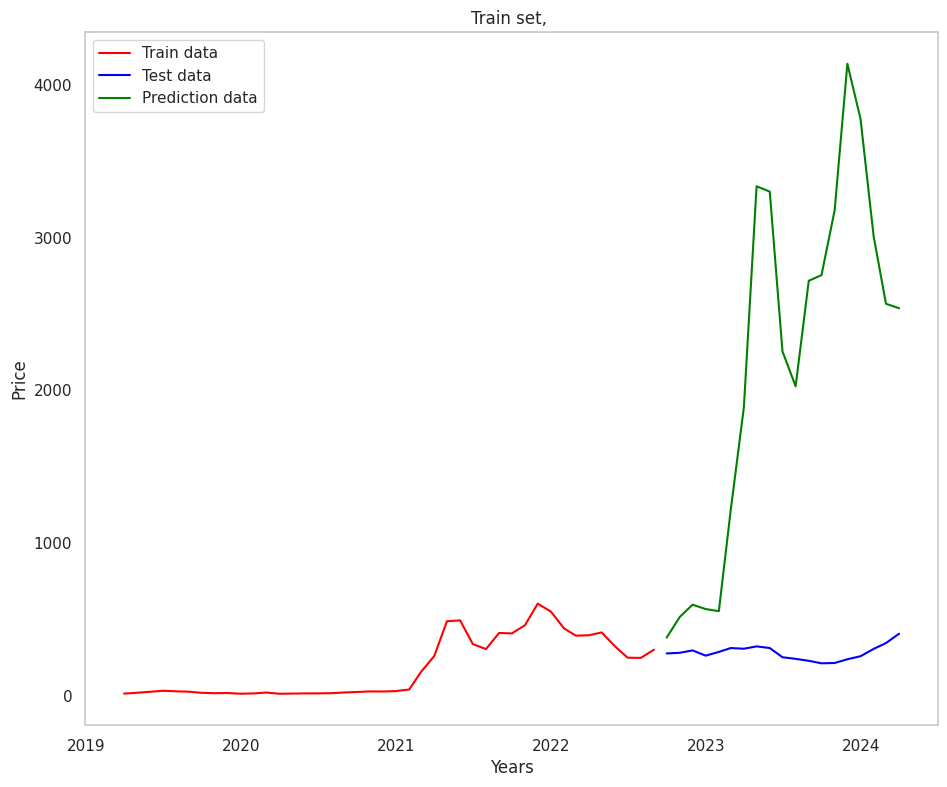

In [308]:
plt.plot(train, color = "red", label ='Train data')
plt.plot(test, color = "blue", label = 'Test data')
plt.plot(predictions, color = "green", label = 'Prediction data')

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()
plt.legend()
plt.show()

In [309]:
# forecast period from the end of available data
start = len(df_monthly)
end = (len(df_monthly) - 1) + 1

forecast = result.predict(start, end)

# let's look at the forecast for the whole of 2023
#forecast[-12:]

In [310]:
start = len(df_monthly)

end = (len(df_monthly) -1) + 2

forecast_1 = result.predict(start, end)

In [311]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 3

forecast_2 = result.predict(start, end)

In [312]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 4

forecast_3 = result.predict(start, end)

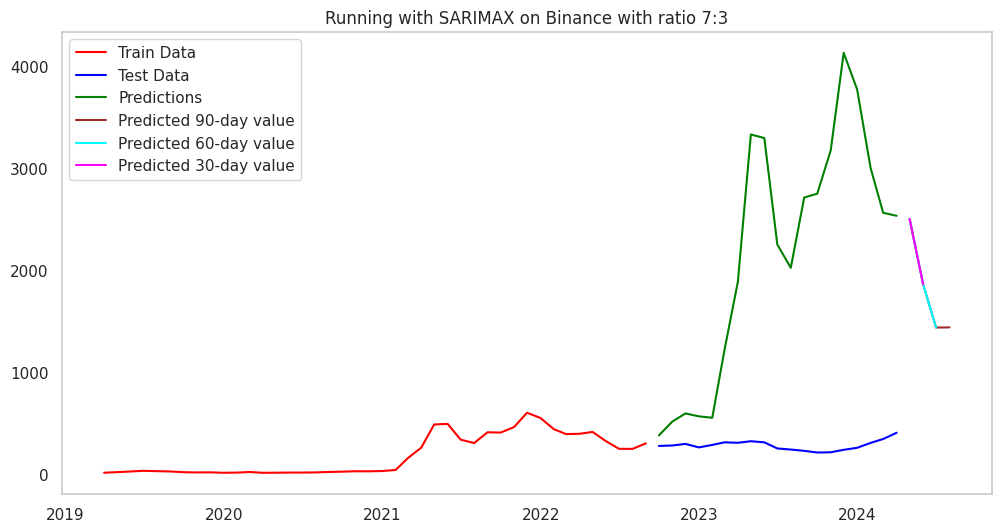

In [313]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_3, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_2, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_1, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running with SARIMAX on Binance with ratio 7:3")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


In [314]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  7.005530816876914
MAE =  1891.3978256503374
RMSE =  2231.0500064463713


###Split data with ratio 8:2




In [259]:
window_size = 10
feature_dim = 5

train_size = 0.8
test_size = 0.2

# model params
lstm_neurons = 20
rnn_neurons = 20
epochs = 100
batch_size = 4
loss = 'mae'
dropout = 0.25
optimizer = 'adam'

In [260]:
df = eth_df[['Price']].copy()


In [261]:
df_monthly = df.resample('M').mean() # changing the step from "daily on weekdays" to "monthly average"
df_monthly.head()

,Price
Date,
2019-03-31,14.959677
2019-04-30,20.614333
2019-05-31,26.913548
2019-06-30,33.775333
2019-07-31,30.068387


<Axes: xlabel='Date'>

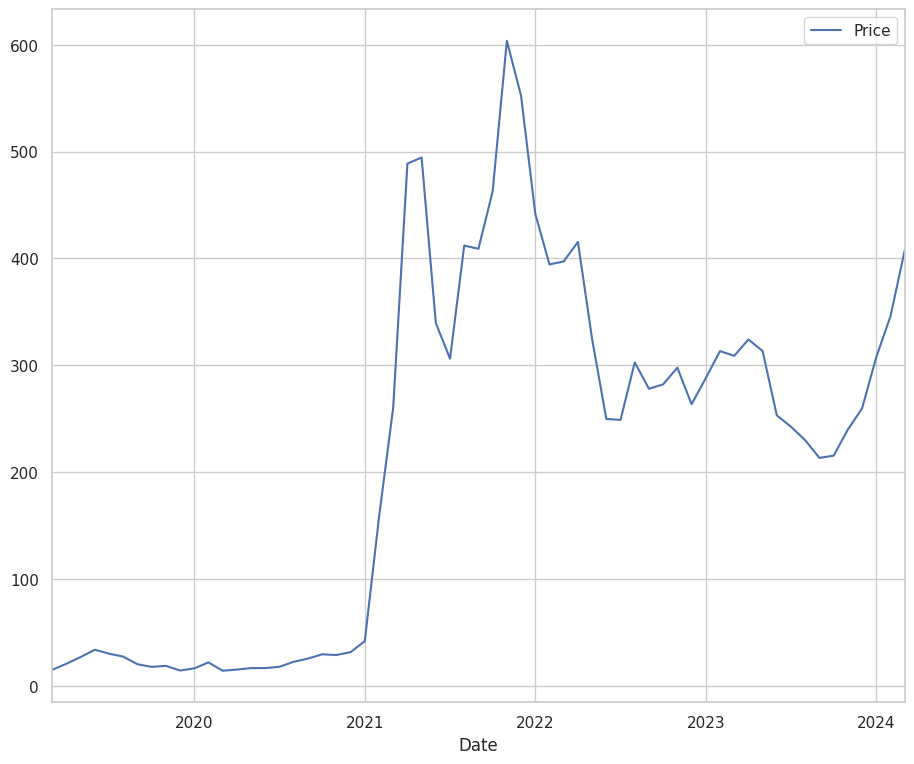

In [262]:
# Let's plot our data
df_monthly.plot()

In [263]:
train_index = int(len(df_monthly)*train_size)
train_index

48

In [264]:
len(df_monthly)

61

In [265]:
# the training set will include data up to and including December 2016
train = df_monthly[:train_index]

# test set will start from January 2017 (essentially one year)
test = df_monthly[train_index:]

In [266]:
print(len(train))


48


In [267]:
print(len(test))

13


In [268]:
df_monthly['month_index'] = df_monthly.index.month
df_monthly

,Price,month_index
Date,,
2019-03-31,14.959677,3
2019-04-30,20.614333,4
2019-05-31,26.913548,5
2019-06-30,33.775333,6
2019-07-31,30.068387,7
...,...,...
2023-11-30,239.862333,11
2023-12-31,259.653871,12
2024-01-31,307.616774,1


In [269]:
import pmdarima as pm
model = pm.auto_arima(train, trace = True,start_P=0, seasonal=True,exogenous=df_monthly,
						d=None, D=1, m=12, max_p=3, max_d=2, max_q=3,
						error_action='ignore',
						suppress_warnings=True,
						stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=500.145, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=420.961, Time=0.29 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=503.409, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=433.131, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=2.57 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=416.559, Time=0.40 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=424.456, Time=0.17 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.62 sec
 AR

In [270]:
# forcibly disable system warnings
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# let's train the model with the appropriate parameters, SARIMAX(0, 2, 2)x(0, 2, 2, 12)
# importing the model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# let's create an object of this model
model = SARIMAX(train,
                 order = (3,0,0),
                seasonal_order = (2,1,1,12),
                enforce_stationarity = False,
                enforce_invertibility = False)

# apply the method fit
result = model.fit(maxiter = 500, method = 'nm')

In [271]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Price   No. Observations:                   48
Model:             SARIMAX(3, 0, 0)x(2, 1, [1], 12)   Log Likelihood                 -43.166
Date:                              Sun, 30 Jun 2024   AIC                            100.332
Time:                                      02:32:37   BIC                            101.712
Sample:                                  03-31-2019   HQIC                            97.352
                                       - 02-28-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6418      0.717      0.895      0.371      -0.764       2.048
ar.L2         -0.3931      1.330     -0.296      0.768      -3.000       2.214
ar.L3          0.3464      0.589      0.588      0.556      -0.808       1.500
ar.S.L12      -0.4686      0.194     -2.419      0.016      -0.848      -0.089
ar.S.L24       0.6881      1.715      0.401      0.688      -2.674       4.050
ma.S.L12      -0.4761      5.094     -0.093      0.926     -10.461       9.509
sigma2       673.4047   3137.638      0.215      0.830   -5476.254    6823.063
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.94   Prob(JB):                         0.67
Heteroskedasticity (H):               3.22   Skew:                            -0.31
Prob(H) (two-sided):                  0.36   Kurtosis:                         1.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [272]:
# the test forecast period will start from the end of the training period
start = len(train)

# and it will end at the end of the test
end = len(train) + len(test) - 1

# apply the method predict
predictions = result.predict(start, end)
predictions

2023-03-31    384.449067
2023-04-30    723.257057
2023-05-31    719.639754
2023-06-30    481.904791
2023-07-31    434.966081
2023-08-31    592.276156
2023-09-30    586.121432
2023-10-31    654.432210
2023-11-30    844.514033
2023-12-31    772.200858
2024-01-31    625.501330
2024-02-29    523.671884
2024-03-31    499.696155
Freq: M, Name: predicted_mean, dtype: float64

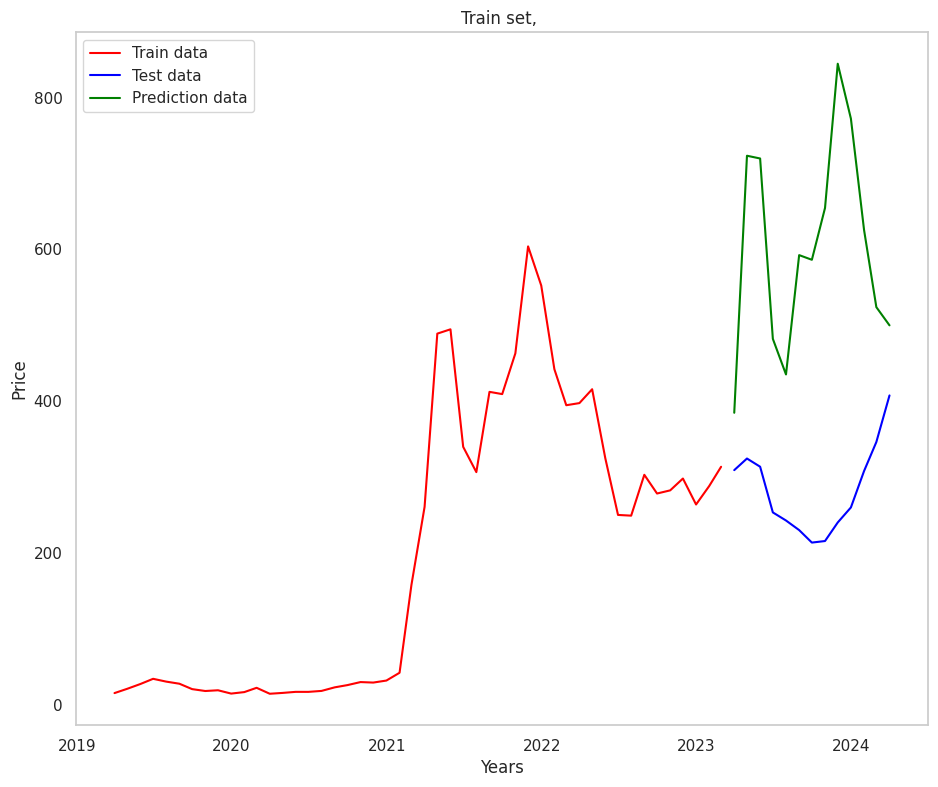

In [273]:
plt.plot(train, color = "red", label ='Train data')
plt.plot(test, color = "blue", label = 'Test data')
plt.plot(predictions, color = "green", label = 'Prediction data')

# title and axis captions
plt.title("Train set, ")
plt.ylabel("Price")
plt.xlabel('Years')

# add a grid
plt.grid()
plt.legend()
plt.show()

In [274]:
# forecast period from the end of available data
start = len(df_monthly)
end = (len(df_monthly) - 1) + 1

forecast = result.predict(start, end)

# let's look at the forecast for the whole of 2023
#forecast[-12:]

In [275]:
start = len(df_monthly)

end = (len(df_monthly) -1) + 2

forecast_1 = result.predict(start, end)

In [276]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 3

forecast_2 = result.predict(start, end)

In [277]:
start = len(df_monthly)

end = (len(df_monthly) -1 ) + 4

forecast_3 = result.predict(start, end)

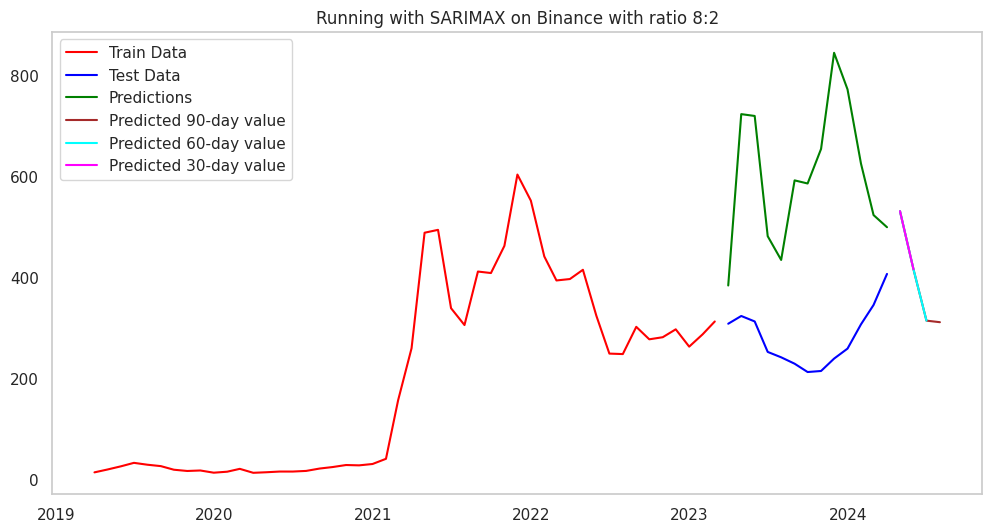

In [278]:
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu train, test và predictions
plt.plot(train, color = "red", label='Train Data')
plt.plot(test, color = "blue", label='Test Data')
plt.plot(predictions, color = "green", label='Predictions')

# Vẽ dữ liệu giá Ethereum và các dự báo
#plt.plot(eth_df['Price'], color = 'black', label='Actual Price')
plt.plot(forecast_3, color = 'brown', label='Predicted 90-day value')
plt.plot(forecast_2, color = 'cyan', label='Predicted 60-day value')
plt.plot(forecast_1, color = 'magenta', label='Predicted 30-day value')

# Thiết lập tiêu đề và nhãn cho trục
plt.title("Running with SARIMAX on Binance with ratio 8:2")
#plt.ylabel("Price")
#plt.xlabel('Date')

# Thêm chú giải
plt.legend()

# Thêm lưới
plt.grid()

# Hiển thị biểu đồ
plt.show()


In [279]:
print('MAPE = ', mean_absolute_percentage_error(test, predictions))
print('MAE = ', mean_absolute_error(test, predictions))
print('RMSE = ', np.sqrt(mean_squared_error(test, predictions)))

MAPE =  1.2386526548352326
MAE =  321.6805267554006
RMSE =  356.4873759796092
